# Segmentación de imágenes de satélite

Based on the tutorial published in [segment-geospatial library documentation](https://github.com/opengeos/segment-geospatial)

## Import libraries

In [1]:
import os
import leafmap
from samgeo import SamGeo, show_image, download_file, overlay_images, tms_to_geotiff

Create an interactive map selecting the center area by coordinates

In [2]:
map = leafmap.Map(center=[-33.110339, -68.923457], zoom=15, height="800px")
map.add_basemap("SATELLITE")
map

Map(center=[-33.110339, -68.923457], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title…

### Create bbox from manual area selection in the map

In [3]:
bbox = map.user_roi_bounds()
bbox

[-68.9352, -33.1132, -68.9152, -33.1029]

## Download satellite images for the selected area

In [4]:
image1 = "satellite1.tif"
tms_to_geotiff(output=image1, bbox=bbox, zoom=15, source="Satellite", overwrite=True)

Downloaded image 1/6
Downloaded image 2/6
Downloaded image 3/6
Downloaded image 4/6
Downloaded image 5/6
Downloaded image 6/6
Saving GeoTIFF. Please wait...
Image saved to satellite1.tif


Visualize the download images

In [5]:
map.layers[-1].visible = False
map.add_raster(image1, layer_name="Image")
map

Map(bottom=5013147.0, center=[-33.110339, -68.923457], controls=(ZoomControl(options=['position', 'zoom_in_tex…

## Download model

## Initialize model

In [6]:
sam = SamGeo(
    model_type="vit_h",
    checkpoint='../models/sam_vit_h_4b8939.pth',
    sam_kwargs=None,
)


## Automatic segmentation with SAM

unique= True generates an unique ID for each element

In [8]:
%%time 
sam.generate(image1, output="masks.tif", foreground=True, unique=True)

UsageError: %%time is a cell magic, but the cell body is empty. Did you mean the line magic %time (single %)?


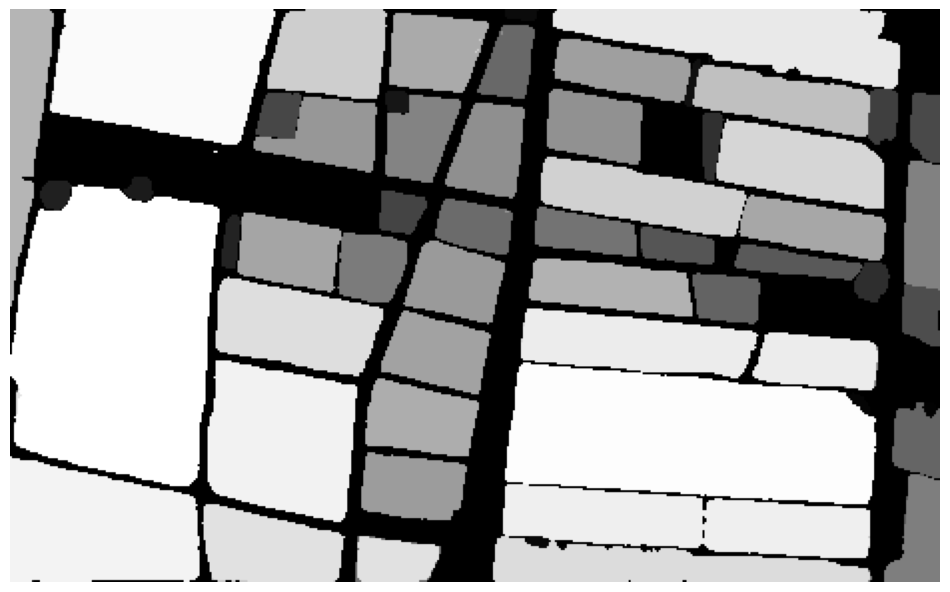

In [9]:
sam.show_masks(cmap="binary_r")


## Show the object annotations (objects with random color) on the map.

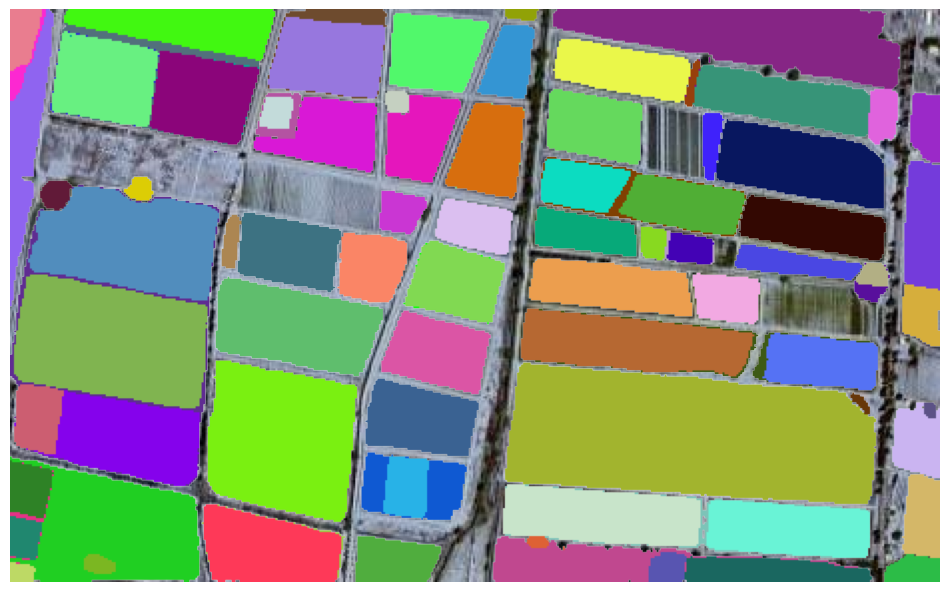

In [10]:
sam.show_anns(axis="off", alpha=1, output="annotations.tif")

## Compare images with a slider


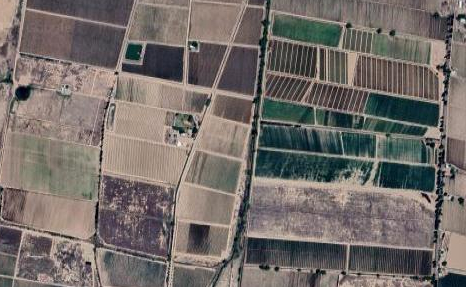
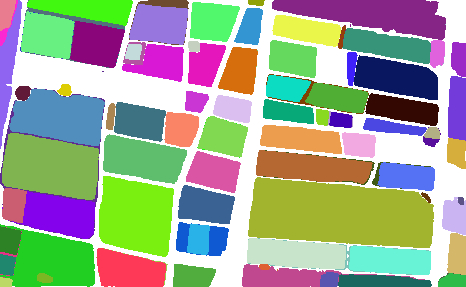

In [11]:
leafmap.image_comparison(
    "satellite1.tif",
    "annotations.tif",
    label1="Satellite Image",
    label2="Image Segmentation",
)

## Show on map

In [12]:
sam.tiff_to_vector("masks.tif", "segments.shp")

In [20]:
style = {
    "color": "#3388ff",
    "weight": 2,
    "fillColor": "#7c4185",
    "fillOpacity": 0.5,
}

map.add_vector("segments.shp", layer_name="Vector", style=style)
map

Map(bottom=10025766.0, center=[-33.108050000000006, -68.92519999999999], controls=(ZoomControl(options=['posit…

## Use annotations

In [13]:
import geopandas as gpd

In [14]:
df = gpd.read_file("segments.shp")
df

value                                           geometry
0      4.0  POLYGON ((-7672646.502 -3908970.196, -7672565....
1     52.0  POLYGON ((-7672656.057 -3909022.660, -7672651....
2     75.0  POLYGON ((-7672708.612 -3909041.737, -7672703....
3     75.0  POLYGON ((-7672713.389 -3909065.585, -7672708....
4     72.0  POLYGON ((-7673716.698 -3909065.585, -7673711....
..     ...                                                ...
110   74.0  POLYGON ((-7673301.041 -3910334.258, -7673291....
111   74.0  POLYGON ((-7673281.931 -3910334.258, -7673262....
112   74.0  POLYGON ((-7673057.381 -3910334.258, -7673052....
113   40.0  POLYGON ((-7672851.941 -3910334.258, -7672832....
114   44.0  POLYGON ((-7671776.968 -3910334.258, -7671772....

[115 rows x 2 columns]

<Axes: >

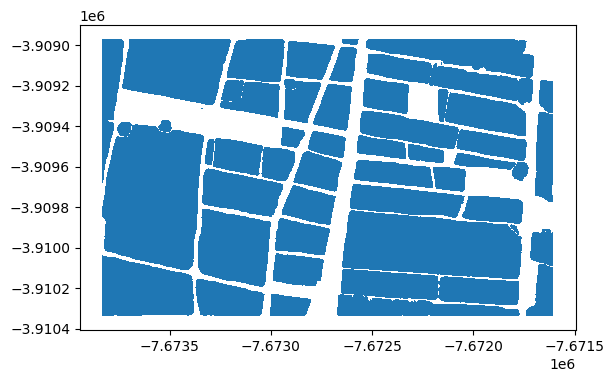

In [16]:
df.plot()